In [14]:
import sklearn as s
s.__version__

'1.0.2'

In [15]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform PCA
from sklearn.decomposition import PCA

Defaulting to user installation because normal site-packages is not writeable


In [16]:
# loading the dataset
data = pd.read_csv("stock_data.csv")

In [17]:
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


In [18]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [19]:
df.info

<bound method DataFrame.info of     Ticker Symbol                 Security             GICS Sector  \
0             AAL  American Airlines Group             Industrials   
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
0                        Airlines      42.349998 

In [20]:
#data cleaning
df.columns = [c.replace(" ", "_") for c in df.columns]
df.drop("Ticker_Symbol", axis=1, inplace=True)
df.duplicated().sum()

0

In [21]:
df.isnull().sum().sum()

0

In [22]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0
Net_Income,340.0,NaN,NaN,NaN,1494384602.941176,3940150279.327937,-23528000000.0,352301250.0,707336000.0,1899000000.0,24442000000.0


In [27]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
plt.savefig('Sectorwise')

<Figure size 800x550 with 0 Axes>

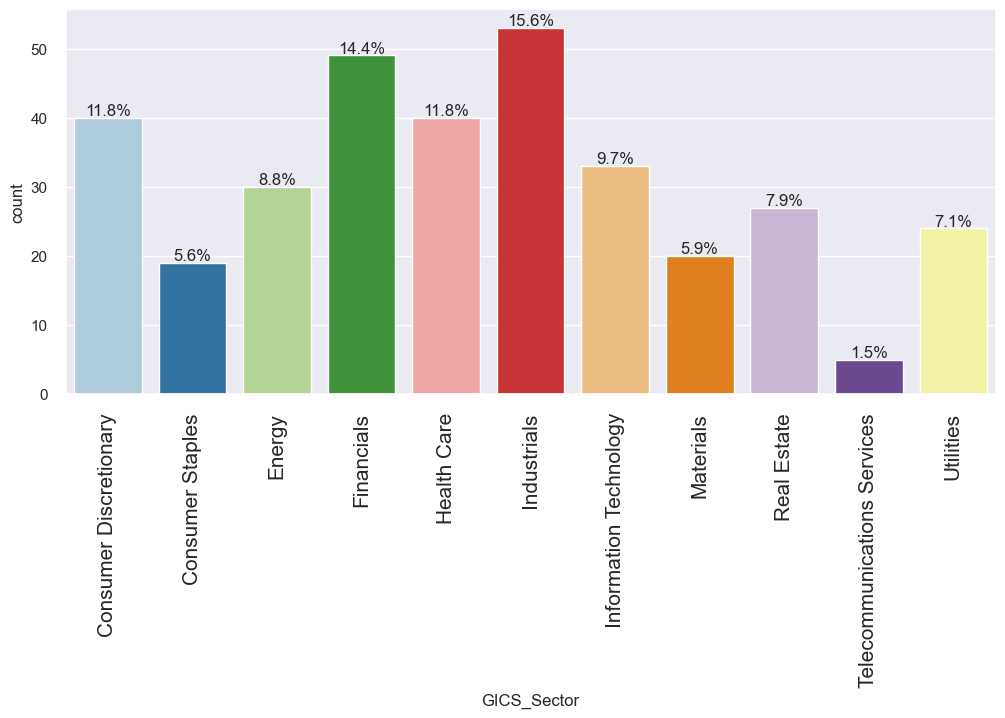

AttributeError: 'NoneType' object has no attribute 'savefig'

In [40]:
labeled_barplot(df, "GICS_Sector", perc=True)


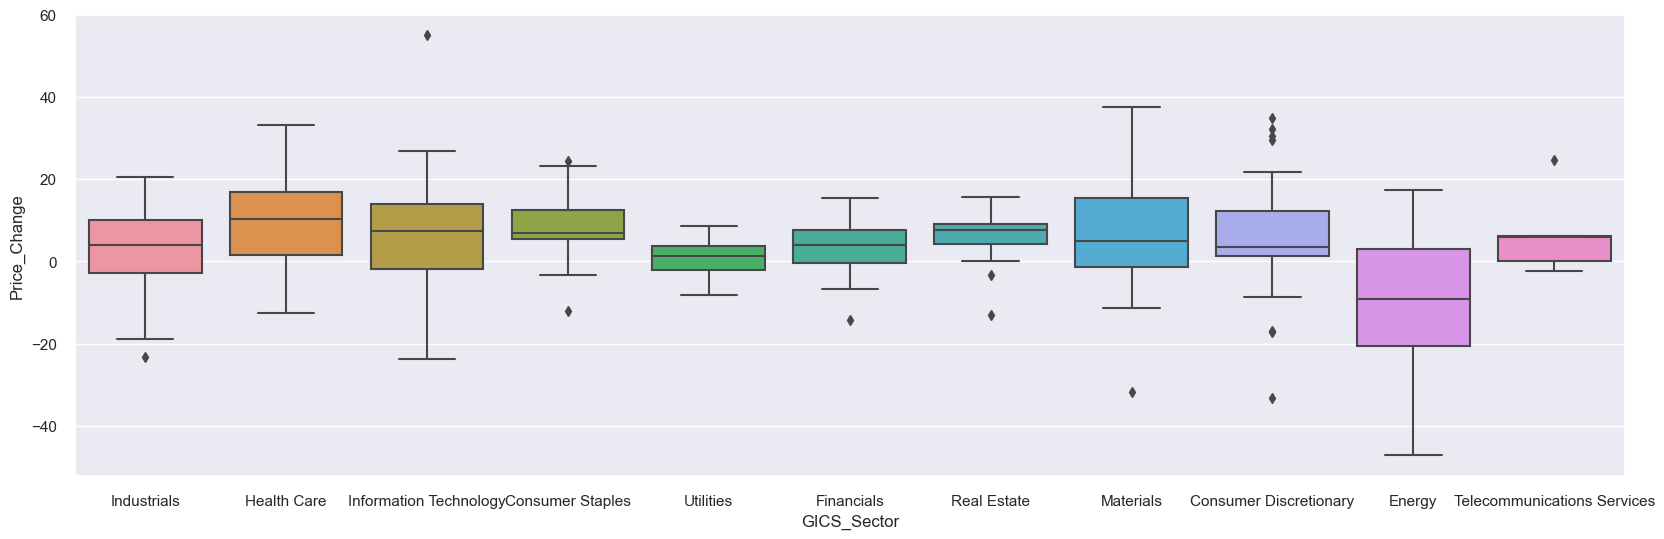

In [29]:
# Bivariate analysis
# Stock Price_Change Vs. GICS_Sector

plt.figure(figsize=(20,6))
sns.boxplot(data = df, y = "Price_Change", x = "GICS_Sector");
plt.savefig('Sector vs Price Change')

In [30]:
# Scaling the data to bring it to the same scale 

sc = StandardScaler()
subset_scaled_df = pd.DataFrame(
    sc.fit_transform(df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1)),
    columns=df.drop(["Security", "GICS_Sector", "GICS_Sub_Industry"], axis=1).columns,
)
subset_scaled_df.head()

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2652173220958
Number of Clusters: 4 	Average Distortion: 2.207451807422965
Number of Clusters: 5 	Average Distortion: 2.1393043217488574
Number of Clusters: 6 	Average Distortion: 2.0745444015095735
Number of Clusters: 7 	Average Distortion: 2.0112900934849915
Number of Clusters: 8 	Average Distortion: 1.9681474690070648


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

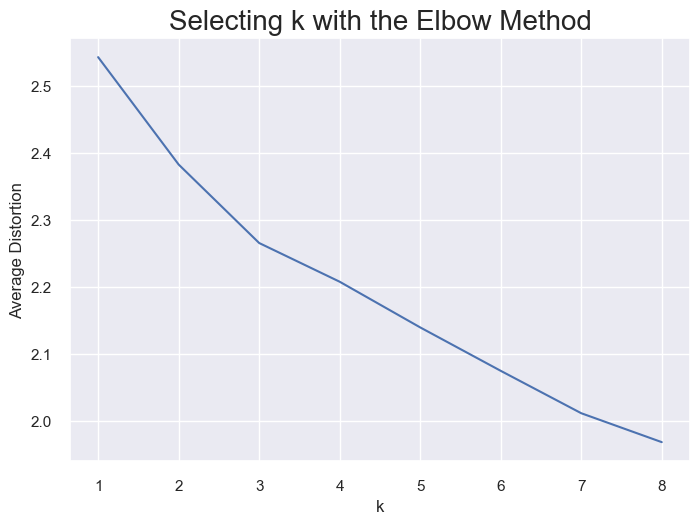

In [31]:
clusters=range(1,9)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title('Selecting k with the Elbow Method', fontsize=20)

In [32]:
# checking silhoutte score

sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    #centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.43969639509980457)
For n_clusters = 3, silhouette score is 0.45547866229080475)
For n_clusters = 4, silhouette score is 0.4577225970476733)
For n_clusters = 5, silhouette score is 0.40999356683171667)
For n_clusters = 6, silhouette score is 0.402826741839592)
For n_clusters = 7, silhouette score is 0.40970461257986346)
For n_clusters = 8, silhouette score is 0.3753929656379589)
For n_clusters = 9, silhouette score is 0.4087256330297377)


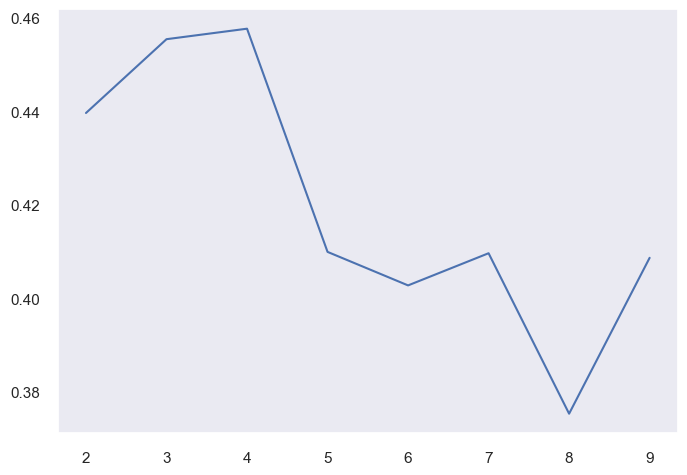

In [33]:
plt.plot(cluster_list,sil_score)
plt.grid()

From Silhouette score, 4 seems to be a good approximate for number of clusters


In [34]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [35]:
df['K_means_segments'] = kmeans.labels_
subset_scaled_df['K_means_segments'] = kmeans.labels_

In [36]:
cluster_profile = df.groupby('K_means_segments').mean()

In [37]:
cluster_profile['count_in_each_segments'] = df.groupby('K_means_segments')['Security'].count().values


In [38]:
cluster_profile

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1.554927e+09,1.572612e+09,6.045200,5.783163e+08,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-1.594285e+08,-3.887458e+09,-9.473704,4.803986e+08,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1.072273e+09,1.483309e+10,4.154545,4.298827e+09,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-1.404622e+07,1.482212e+09,3.621029,4.385338e+08,23.843656,-3.358948,277


In [39]:
num_cols = subset_scaled_df.columns

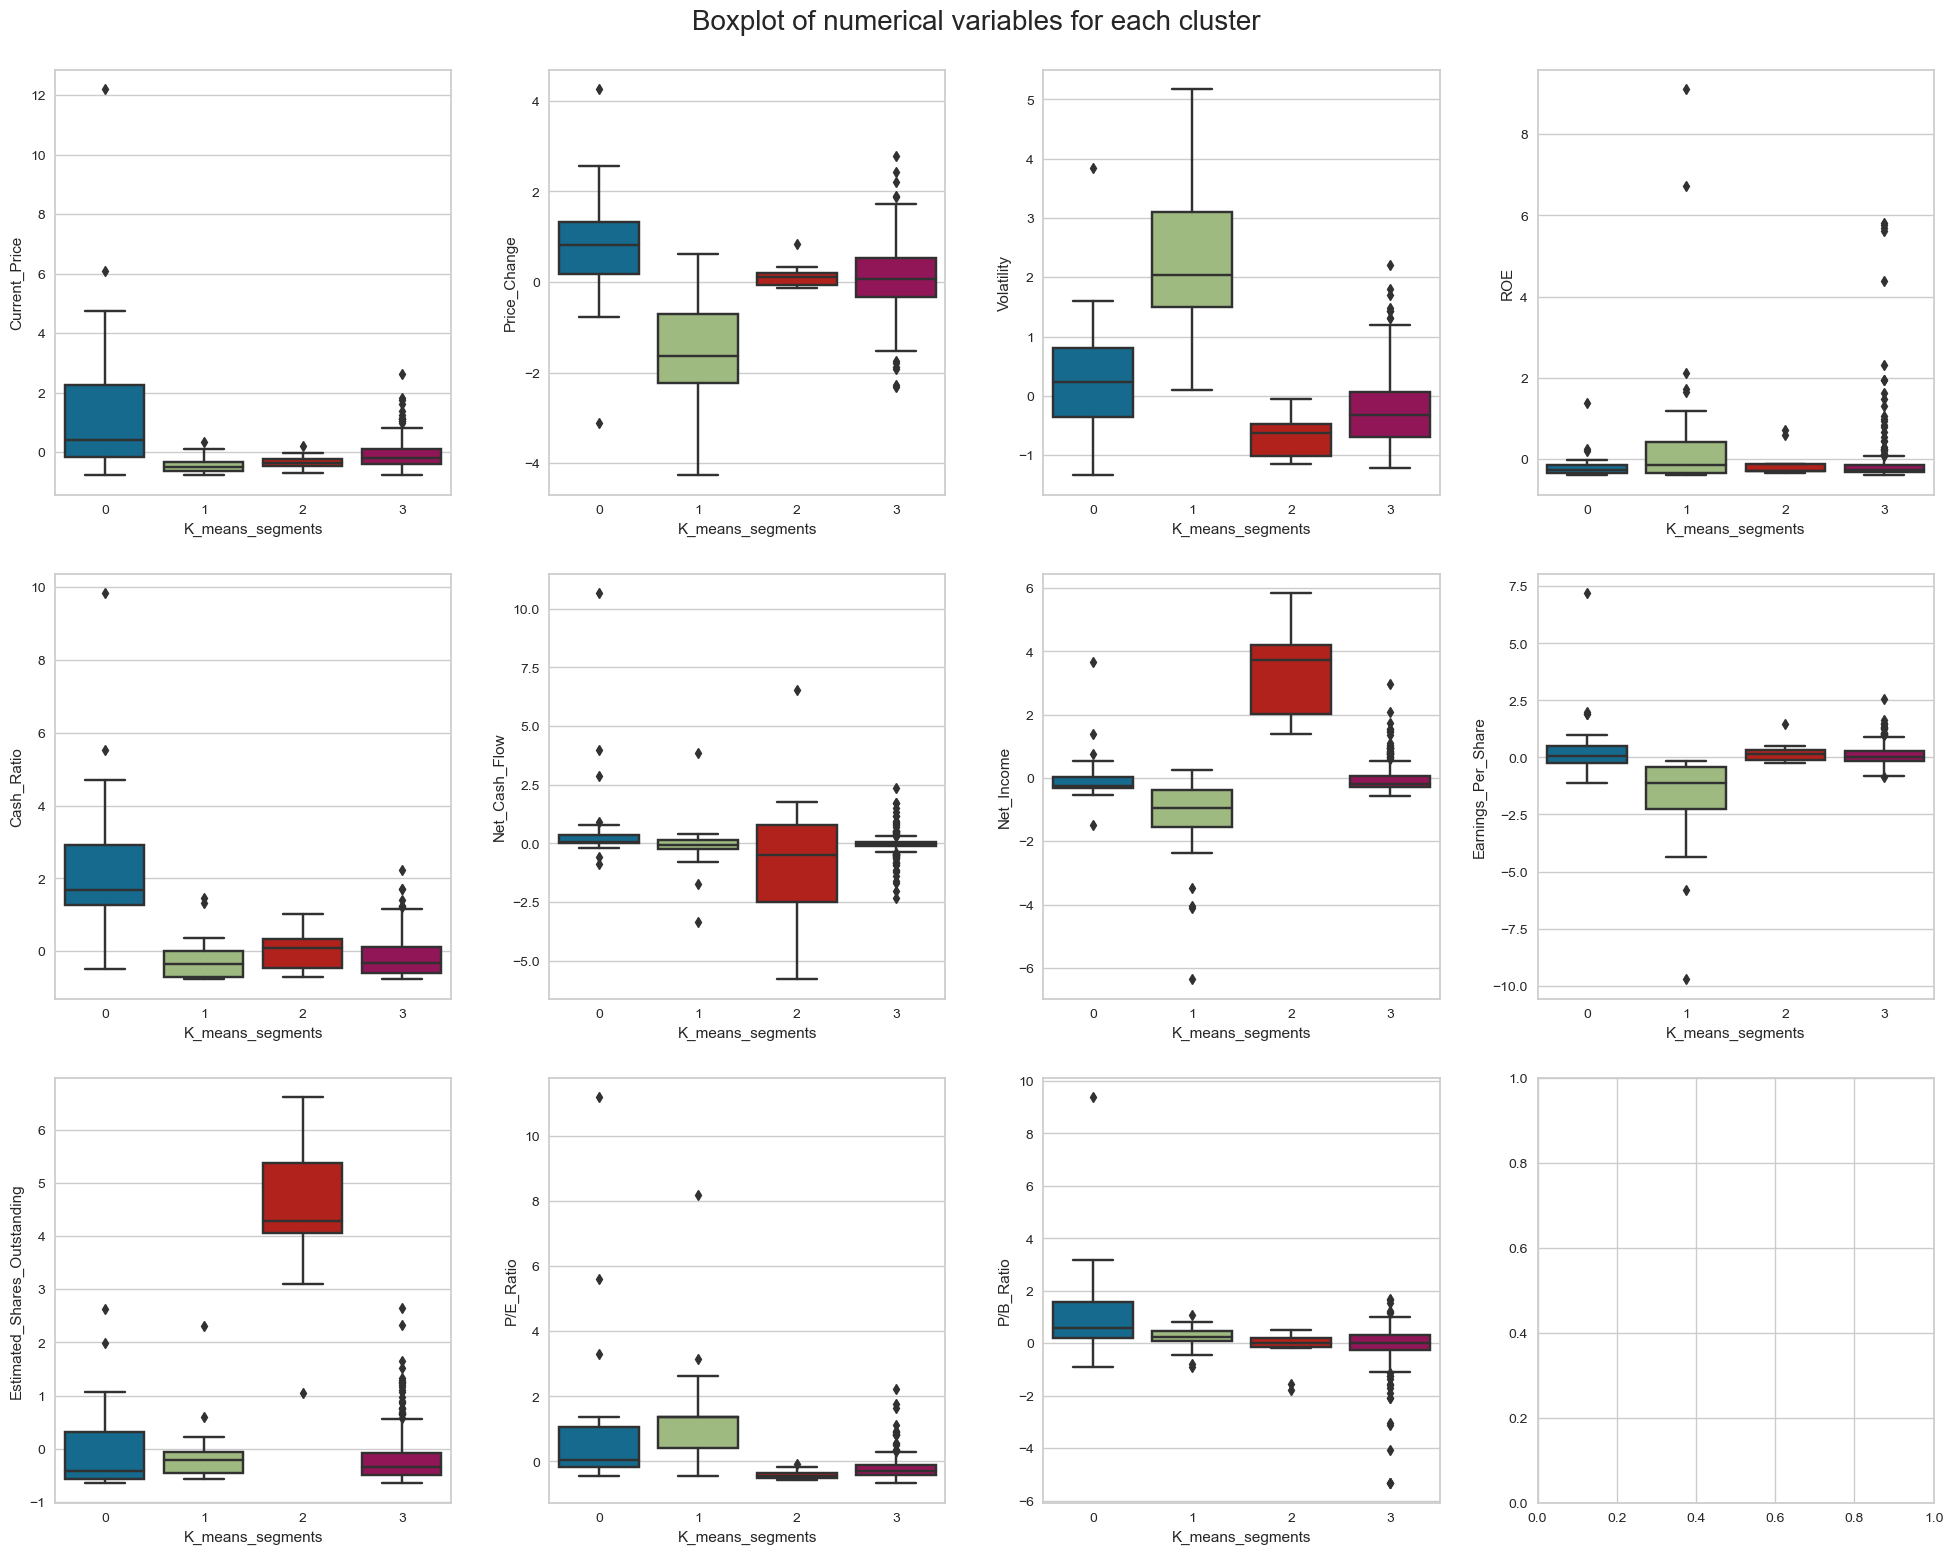

In [28]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['K_means_segments'])
        counter = counter+1

fig.tight_layout(pad=2.0)

In [26]:
# Comparing cluster vs. GICS_Sector

pd.crosstab(df.GICS_Sector, df.K_means_segments).style.highlight_max(color = 'lightgreen', axis = 0)

K_means_segments,0,1,2,3
GICS_Sector,,,,
Consumer Discretionary,6,0,1,33
Consumer Staples,1,0,1,17
Energy,1,22,1,6
Financials,1,0,3,45
Health Care,9,0,2,29
Industrials,0,1,0,52
Information Technology,5,3,1,24
Materials,0,1,0,19
Real Estate,1,0,0,26


#Insights
Cluster 0

Has about 25 different securities
This cluster has securities with very high average Current_Price of $234
As well, cluster has securities with very high Cash_Ratio of 277, high earnings per share of 6.05 and high P/B_Ratio of 14.4
Cluster 1

Has about 27 different securities
This cluster has securities with among the lowest average Current_Price of $38 and negative average Price_Change of -15.3
As well, cluster has securities with among the highest volatility of 2.9, making them more riskier
This cluster also has the lowest Cash_Ratio of 50,low Net_Income (i.e., negative) of -3.887458e+09, low Earnings_Per_Share (i.e., negative) of -9.4
Cluster 3

Has the majority of securities at 277
This cluster has securities that lie in between Cluster 0 & Cluster 1 i.e, intermediate Current_Price of $72, intermediate Price_Change of 5.066 (neither positive & high like cluster 0 nor negative and high like cluster 2), and intermediate volatility
Cluster 2

Has only 11 different securities
This cluster is very similar to Cluster 3 in it's behavior but with two striking differences:
Has securities with some of the highest average Net_Income of 1.483309e+10 (almost 10 times of those in Cluster 3)
Has securities with some of the highest Estimated_Shares_Outstanding of 4.298827e+09 (almost 10 times of those in Cluster 3)
Clusters 3 and 2 are the safe clusters, with clusters 2 containing more exclusive securities. Clusters 0 and 1 are more riskier securities, former being high performing and later historically speaking low performing

In [43]:
cluster_profile.to_excel('data.xlsx', index=False)